In [14]:
import argparse
from pathlib import Path
import pycolmap
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
def load_model(model_dir):
    reconstruction = pycolmap.Reconstruction(model_dir)
    return reconstruction

In [3]:
def plot_reconstruction(reconstruction):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot 3D points
    points3D = np.array([p.xyz for p in reconstruction.points3D.values()])
    if len(points3D) > 0:
        ax.scatter(points3D[:, 0], points3D[:, 1], points3D[:, 2],
                   c='b', s=1, label='3D Points')

    # Plot camera centers
    cam_centers = []
    for image in reconstruction.images.values():
        cam_centers.append(image.projection_center())
    cam_centers = np.array(cam_centers)
    if len(cam_centers) > 0:
        ax.scatter(cam_centers[:, 0], cam_centers[:, 1], cam_centers[:, 2],
                   c='r', s=20, marker='^', label='Cameras')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.set_title('COLMAP 3D Reconstruction')
    plt.show()

In [9]:
def plot_reconstruction_open3d(reconstruction):
    # Tạo point cloud từ points3D
    points3D = np.array([p.xyz for p in reconstruction.points3D.values()])
    if len(points3D) == 0:
        print("No 3D points to display.")
        return

    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points3D)
    pcd.paint_uniform_color([0.1, 0.7, 0.9])

    # Tạo mesh nhỏ để hiển thị vị trí camera
    cam_centers = np.array([img.projection_center() for img in reconstruction.images.values()])
    cam_spheres = []
    for c in cam_centers:
        sphere = o3d.geometry.TriangleMesh.create_sphere(radius=0.05)
        sphere.translate(c)
        sphere.paint_uniform_color([1, 0, 0])
        cam_spheres.append(sphere)

    # Hiển thị
    o3d.visualization.draw_geometries([pcd] + cam_spheres)


In [16]:
model_dir = "/home/namtt/WorkSpace/VisualLocalization/valid_capture/HYDRO/benchmarking_salad/mapping/spot_map/triangulation/superpoint/megaloc-10_frustum_pose-120-20-250/lightglue/sfm"

In [17]:
reconstruction = load_model(model_dir)

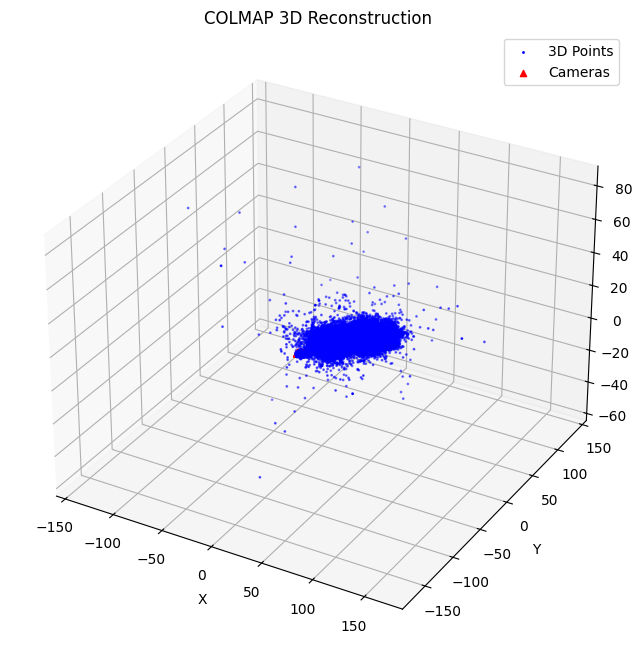

In [12]:
plot_reconstruction(reconstruction)

In [19]:
plot_reconstruction_open3d(reconstruction)